In [1]:
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=100, n_features=4, noise=1, random_state=42)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import Ridge

In [9]:
ridge = Ridge()

In [10]:
ridge.fit(X_train, y_train)

Ridge()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
y_pred = ridge.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

3.1294459058662256
0.9995095874632411


In [14]:
parameters = {
  'alpha' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
ridge_cv = GridSearchCV(ridge, parameters, cv = 3, n_jobs=-1)

# n_jobs = -1 is to use all CPU cores

In [17]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [18]:
y_pred2 = ridge_cv.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred2)
print(mse)
r2 = r2_score(y_test, y_pred2)
print(r2)

1.090272078611399
0.9998291444837482


In [20]:
print(ridge_cv.best_estimator_)

Ridge(alpha=0.001)


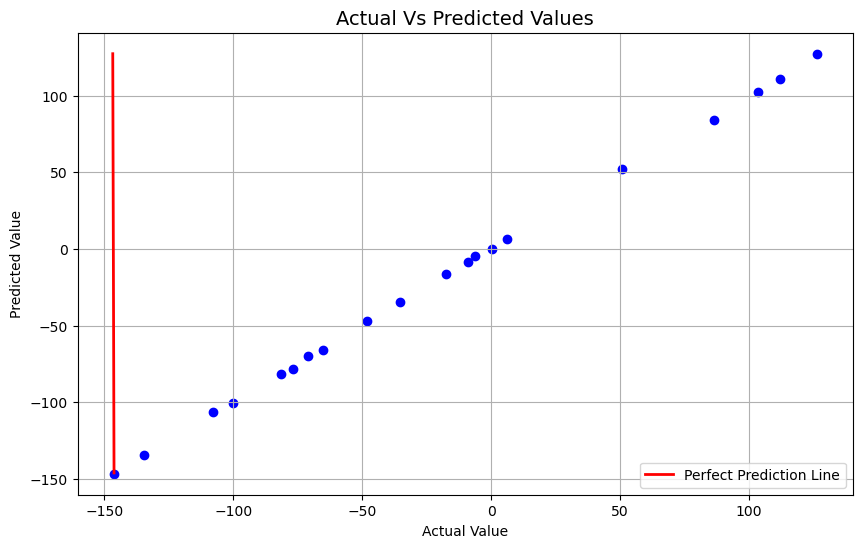

In [21]:
# Plot Actual vs Predicted values

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("Actual Vs Predicted Values", fontsize = 14)
plt.scatter(y_test, y_pred2, color = 'blue')
plt.plot([y_test.min(), y_pred2.min()], [y_test.min(), y_pred2.max()], color = 'red', linewidth = 2, label = 'Perfect Prediction Line')
plt.xlabel('Actual Value', fontsize = 10)
plt.ylabel('Predicted Value', fontsize = 10)
plt.legend()

plt.grid(True)

plt.show()

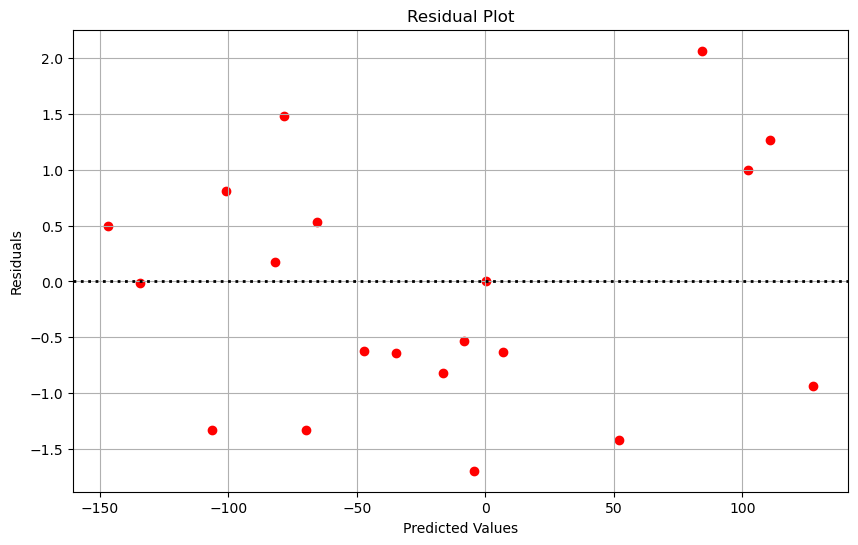

In [22]:
# Calculate Residuals

residuals = y_test - y_pred2

plt.figure(figsize=(10,6))
plt.title("Residual Plot")
plt.scatter(y_pred2, residuals, color = 'red')
plt.axhline(y=0, color = 'black', linestyle = ':', linewidth = 2)

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.grid(True)
plt.show()